In [124]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

## Referance:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py 

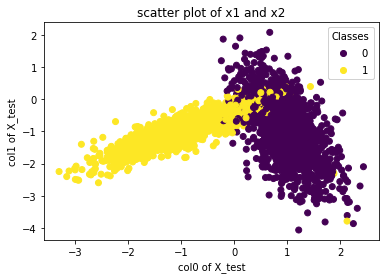

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
scatter = ax.scatter(X_test[:,0], X_test[:,1],c=y_test,label=colors)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.title("scatter plot of x1 and x2")
plt.xlabel('col0 of X_test')
plt.ylabel('col1 of X_test')
plt.show()

# Implementing Custom RandomSearchCV

We are provided with the GridSearch Implementation custom and as per the differnce between both search - only thing i can see is :

in Gridsearch model trained the data with all hyperparameter (in case  knn k - 1,3,5,7,9,etc) and Random Search select hyper parameter randomly.

Implementation:

In this section i should only care about the random generation of the hyperparameter...right?

Apart, from that everything should be same..right?

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

## Referance:
https://www.kaggle.com/bhushanyadav07/implementing-custom-randomsearchcv 


In [126]:
def random_params_range_1_to_len(params_range):
    sort_values = random.sample(range(1, params_range),10) # taking 10 values between 1 to params_range
    sort_values.sort()
    return sort_values

In [127]:
from sklearn.metrics import accuracy_score
import random 
from tqdm import tqdm

def RandomSerachCV(x_train, y_train, classifier, params, folds):
    trainscores = []
    testscores  = [] 
    k_values = []
    
    #Randomly selected numbers from params_range
    params_list= random_params_range_1_to_len(params_range) #Randomly selected numbers from params_range
    #printing the random paramter values
    print(params_list)
    
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0, folds): #fold = [1,2,3]
            #formulae for finding length
            Values = (len(x_train)/ (folds))
            #covert into integer values
            boundary = int(Values)
            
            
            test_indices=list(set(list(range((boundary*j), (boundary*(j+1)))))) # (0,2500),(2500,5000),(5000,7500)
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))  # (0,7500) - (0,2500)
            # selecting the data points based on the train_indices and test_indices
            
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train) # Y_prediction(ie, Y_train) on X_train dataset. 
                                                      # Here y_train is already seen during fitting of X_train,Y_train.
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))  # mean of acc1,acc2,acc3 using X_train
        testscores.append(np.mean(np.array(testscores_folds))) # mean of acc4,acc5,acc6 using X_CV
     
      
    return trainscores,testscores,params # returing the average accuracy score using X_train and avg accuracy score using X_CV

  0%|          | 0/10 [00:00<?, ?it/s]

[4, 15, 17, 19, 30, 35, 39, 41, 43, 47]


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

[0.9624666666666667, 0.9589333333333334, 0.9582666666666667, 0.9582, 0.9580666666666667, 0.9579333333333334, 0.9576666666666666, 0.9575333333333335, 0.9575333333333332, 0.9571333333333333]


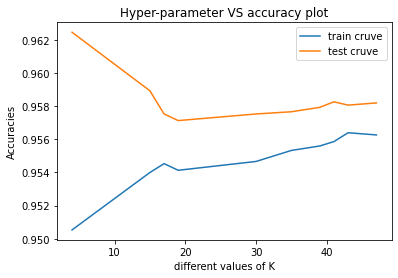

In [133]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range = 50
folds = 3
testscores, trainscores, params = RandomSerachCV(X_train, y_train, neigh, params_range, folds)
print(sorted(testscores,reverse=True))
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("different values of K")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

## Referance:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py 

In [134]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
   
    fig, ax = plt.subplots()  # creating area figure (like canvas) and Axes is a part of that canvas on which we will make a particular visualization.
    colors = {0:'red', 1:'blue'}
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    scatter = ax.scatter(X1, X2, c=y, cmap=cmap_bold)
    legend1 = ax.legend(*scatter.legend_elements(), 
                    loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

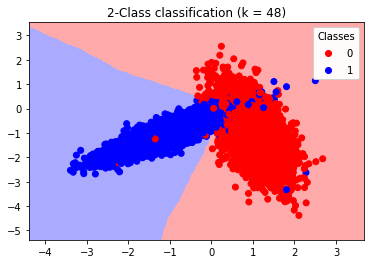

In [135]:
from matplotlib.colors import ListedColormap

neigh = KNeighborsClassifier(n_neighbors = 48)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
